To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [11]:
#install packages if required
#%pip install networkx

In [12]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [13]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [14]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['SiouxFalls']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [15]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/' + cities[0] + '/' + 'pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [16]:
cities_dict = make_dict(cities)
cities_dict

{'SiouxFalls': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/SiouxFalls/SiouxFalls_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/SiouxFalls/SiouxFalls_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/SiouxFalls/SiouxFalls_trips.tntp.txt'}}}

# instantiate class

In [17]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [18]:
#set city for investigation
city = cities[0]

In [19]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init node,term node,capacity,length,free flow time,b,power,speed limit,toll,type
0,1,2,25900.200640,6,6,0.15,4,0,0,1
1,1,3,23403.473190,4,4,0.15,4,0,0,1
2,2,1,25900.200640,6,6,0.15,4,0,0,1
3,2,6,4958.180928,5,5,0.15,4,0,0,1
4,3,1,23403.473190,4,4,0.15,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1
72,23,24,5078.508436,2,2,0.15,4,0,0,1
73,24,13,5091.256152,4,4,0.15,4,0,0,1
74,24,21,4885.357564,3,3,0.15,4,0,0,1


# Plot graph

Total number of nodes in SiouxFalls: 24
Total number of edges in SiouxFalls: 76
Graph for: SiouxFalls


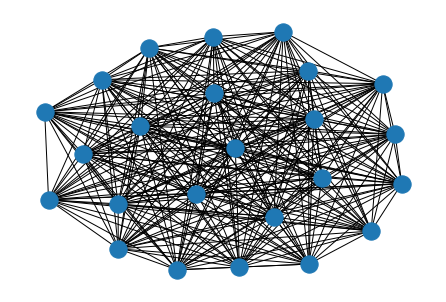

In [20]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [21]:
#observe network with all links
remove_link = 0 #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

SiouxFalls graph is: DiGraph with 24 nodes and 76 edges
SiouxFalls origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
SiouxFalls flows are: {('1', '1'): 0.0, ('1', '2'): 100.0, ('1', '3'): 100.0, ('1', '4'): 500.0, ('1', '5'): 200.0, ('1', '6'): 300.0, ('1', '7'): 500.0, ('1', '8'): 800.0, ('1', '9'): 500.0, ('1', '10'): 1300.0, ('1', '11'): 500.0, ('1', '12'): 200.0, ('1', '13'): 500.0, ('1', '14'): 300.0, ('1', '15'): 500.0, ('1', '16'): 500.0, ('1', '17'): 400.0, ('1', '18'): 100.0, ('1', '19'): 300.0, ('1', '20'): 300.0, ('1', '21'): 100.0, ('1', '22'): 400.0, ('1', '23'): 300.0, ('1', '24'): 100.0, ('2', '1'): 100.0, ('2', '2'): 0.0, ('2', '3'): 100.0, ('2', '4'): 200.0, ('2', '5'): 100.0, ('2', '6'): 400.0, ('2', '7'): 200.0, ('2', '8'): 400.0, ('2', '9'): 200.0, ('2', '10'): 600.0, ('2', '11'): 200.0, ('2', '12'): 100.0, ('2', '13'): 300.0, ('2', '14'): 100.0, ('2', '15'): 100.

In [22]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

SiouxFalls graph is: DiGraph with 24 nodes and 75 edges
SiouxFalls origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
SiouxFalls flows are: {('1', '1'): 0.0, ('1', '2'): 100.0, ('1', '3'): 100.0, ('1', '4'): 500.0, ('1', '5'): 200.0, ('1', '6'): 300.0, ('1', '7'): 500.0, ('1', '8'): 800.0, ('1', '9'): 500.0, ('1', '10'): 1300.0, ('1', '11'): 500.0, ('1', '12'): 200.0, ('1', '13'): 500.0, ('1', '14'): 300.0, ('1', '15'): 500.0, ('1', '16'): 500.0, ('1', '17'): 400.0, ('1', '18'): 100.0, ('1', '19'): 300.0, ('1', '20'): 300.0, ('1', '21'): 100.0, ('1', '22'): 400.0, ('1', '23'): 300.0, ('1', '24'): 100.0, ('2', '1'): 100.0, ('2', '2'): 0.0, ('2', '3'): 100.0, ('2', '4'): 200.0, ('2', '5'): 100.0, ('2', '6'): 400.0, ('2', '7'): 200.0, ('2', '8'): 400.0, ('2', '9'): 200.0, ('2', '10'): 600.0, ('2', '11'): 200.0, ('2', '12'): 100.0, ('2', '13'): 300.0, ('2', '14'): 100.0, ('2', '15'): 100.

# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [23]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

Results for: SiouxFalls
1  ->  2 :  4494.541769891608
1  ->  3 :  8118.778958018833
2  ->  1 :  4519.221797661597
2  ->  6 :  5967.415424264172
3  ->  1 :  8094.098930248844
3  ->  4 :  14011.734532365375
3  ->  12 :  10027.635980625804
6  ->  2 :  5992.095452034151
6  ->  5 :  8806.410890570694
6  ->  8 :  12492.075338963252
4  ->  3 :  14035.300255284554
4  ->  5 :  18010.561177668467
4  ->  11 :  5203.13865525387
12  ->  3 :  9979.390229936655
12  ->  11 :  8404.306735865635
12  ->  13 :  12293.499582309718
5  ->  4 :  18034.525518068713
5  ->  6 :  8797.1895868881
5  ->  9 :  15783.996289327333
11  ->  4 :  5302.740037772761
11  ->  10 :  17603.652145860353
11  ->  12 :  8365.259304287434
11  ->  14 :  9776.846543284393
9  ->  5 :  15798.73932604504
9  ->  8 :  6837.003588255241
9  ->  10 :  21745.98823492458
8  ->  6 :  12525.976670415792
8  ->  7 :  12041.696631484156
8  ->  9 :  6881.813917130209
8  ->  16 :  8387.782258682433
7  ->  8 :  12102.268632570476
7  ->  18 :  15797.41

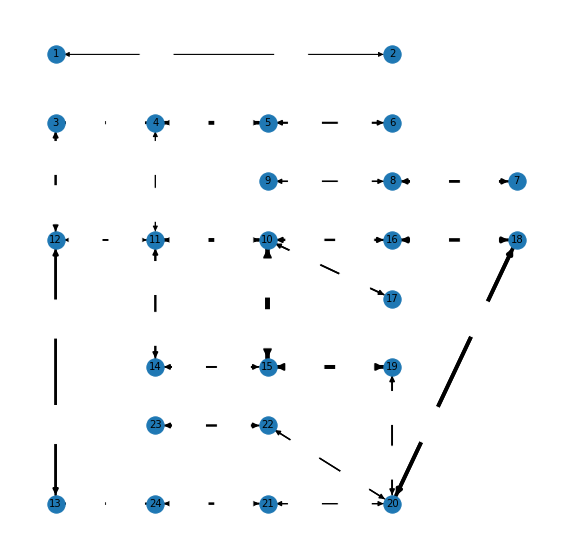

In [24]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Compute equilibrium flow for one closed link in example city using Frank-Wolfe algorithm

In [25]:
%%time

#compute the eq flow for one example city and one closed link
remove_link = 1
trial_run.compute_link_flow(city, remove_link)

Results for: SiouxFalls
1  ->  2 :  4965.7880830145
1  ->  3 :  8369.381896331546
2  ->  1 :  4770.035942663004
2  ->  6 :  6301.521997851713
3  ->  1 :  8565.134036683055
3  ->  4 :  16459.458086119863
3  ->  12 :  10607.948612168271
6  ->  2 :  6105.769857500197
6  ->  5 :  8800.910473431877
6  ->  8 :  12971.172531606147
4  ->  3 :  14902.088290039928
4  ->  5 :  19580.047546394428
4  ->  11 :  6081.015453411736
12  ->  3 :  12361.07054859975
12  ->  11 :  9109.643572460269
12  ->  13 :  12575.663951386037
5  ->  4 :  18898.776596238593
5  ->  6 :  8804.536002488156
5  ->  9 :  17010.577749550812
11  ->  4 :  5304.916607487626
11  ->  10 :  17393.9656458668
11  ->  12 :  8766.163133941585
11  ->  14 :  10371.136497529289
9  ->  5 :  16332.932328451325
9  ->  8 :  6984.55009184866
9  ->  10 :  22826.03448628367
8  ->  6 :  12771.79486219838
8  ->  7 :  12499.75987181408
8  ->  9 :  7001.093896310519
8  ->  16 :  8556.407579656438
7  ->  8 :  12365.974727487714
7  ->  18 :  16397.2109

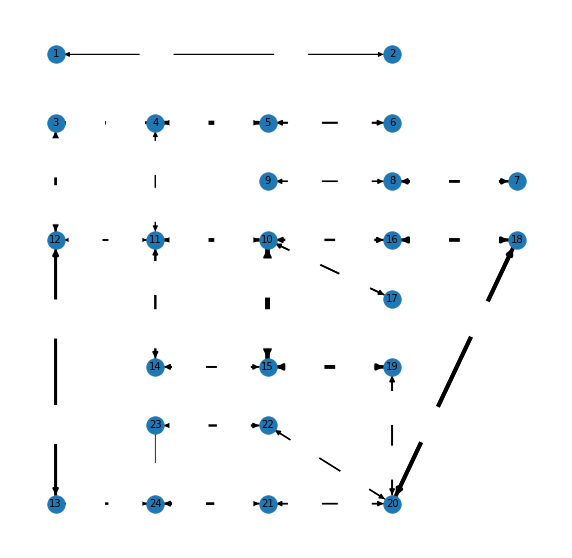

In [26]:
#report eq flow for one example city and one closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [27]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [28]:
#view a network with edge removed
removed_link = 8
trial_run.make_network(city, removed_link)
trial_run.network_attributes(city, removed_link)

SiouxFalls graph is: DiGraph with 24 nodes and 75 edges
SiouxFalls origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
SiouxFalls flows are: {('1', '1'): 0.0, ('1', '2'): 100.0, ('1', '3'): 100.0, ('1', '4'): 500.0, ('1', '5'): 200.0, ('1', '6'): 300.0, ('1', '7'): 500.0, ('1', '8'): 800.0, ('1', '9'): 500.0, ('1', '10'): 1300.0, ('1', '11'): 500.0, ('1', '12'): 200.0, ('1', '13'): 500.0, ('1', '14'): 300.0, ('1', '15'): 500.0, ('1', '16'): 500.0, ('1', '17'): 400.0, ('1', '18'): 100.0, ('1', '19'): 300.0, ('1', '20'): 300.0, ('1', '21'): 100.0, ('1', '22'): 400.0, ('1', '23'): 300.0, ('1', '24'): 100.0, ('2', '1'): 100.0, ('2', '2'): 0.0, ('2', '3'): 100.0, ('2', '4'): 200.0, ('2', '5'): 100.0, ('2', '6'): 400.0, ('2', '7'): 200.0, ('2', '8'): 400.0, ('2', '9'): 200.0, ('2', '10'): 600.0, ('2', '11'): 200.0, ('2', '12'): 100.0, ('2', '13'): 300.0, ('2', '14'): 100.0, ('2', '15'): 100.

In [ ]:
%%time

trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

In [ ]:
## for below analysis, remember that the removed_link = 1 means the last row in the trip file is removed. 
# Removed_link = 2 means the second last row is removed, and so on.
# You can use this for the mapping from fw eq flow results to the csv/dataframe.


removed_link = 0
#density
nx.density(cities_dict[city][str(remove_link)]['network'].graph)

#diameter
nx.diameter(cities_dict[city][str(remove_link)]['network'].graph)

#check this out for centrality https://networkx.org/documentation/stable/reference/algorithms/centrality.html

#betweeness origin

#eigenvector origin

#betweeness destination

#eigenvector destination

#flow - from initial trips file i think 

#cost - will need to compute